<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/regression_basics_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For Background on the Dataset see: https://cps.ipums.org/cps-action/variables/group

### **Clone Library**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 956, done.
remote: Counting objects: 100% (573/573), done.
remote: Compressing objects: 100% (222/222), done.
remote: Total 956 (delta 420), reused 428 (delta 328), pack-reused 383 (from 1)
Receiving objects: 100% (956/956), 18.26 MiB | 16.28 MiB/s, done.
Resolving deltas: 100% (548/548), done.


### **Import Packages**

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

### **Read In Data Set**

In [7]:
df = pd.read_csv('/content/business-analytics/datasets/brookline.csv')
df.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


### Fill in the following code to create a Scatter Plot of Size and Price

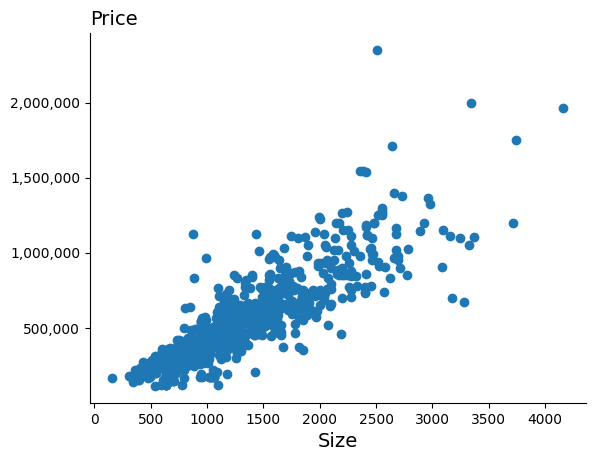

In [10]:
plt.scatter(df['size'], df['price'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.show()

### Use the following code to fit the linear model:

$$\text{Price}_i = \beta_0 + \beta_1 \text{Size}_i + ɛ_i$$

In [21]:
#reg = smf.ols('[Insert Dependent/Outcome Variable] ~ [Insert Independent Variable/Control/Feature]', data = df).fit()
reg = smf.ols('price ~ size', data = df).fit()

#### Extract the Fitted Parameters $\hat{\beta}_0$ , $\hat{\beta}_1$ via the `.params` attribute

In [22]:
reg.params

,0
Intercept,12934.124023
size,407.451333


### Use `.fittedvalues` to overlay the line of best fit on top of the scatter plot of points

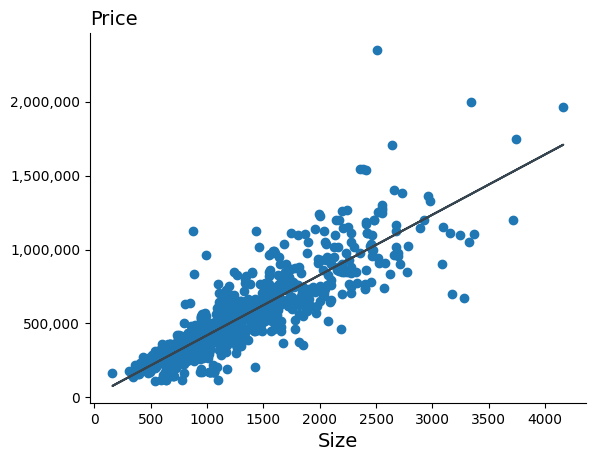

In [26]:
plt.scatter(df['size'], df['price'])
plt.plot(df['size'], reg.fittedvalues, color="#36454F")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.show()

### Use `.resid` to create a scatter plot of Size and the Residual Values

$$r_i(\beta_0, \beta_1) = y_i - (\beta_0 + \beta_1 x_i)$$

In [27]:
print(summary_col([reg],
                  stars=True,
                  float_format='%0.2f'))


                 price  
------------------------
Intercept      12934.12 
               (9705.71)
size           407.45***
               (7.17)   
R-squared      0.75     
R-squared Adj. 0.75     
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01
